In [2]:
from IPython.display import Image

## RNN은 시퀀스 모델로, 입력과 출력을 시퀀스 단위로 처리하는 모델이다.  

### 1. 순환 신경망(RNN)

앞서 배운 신경망들은 전부 은닉층에서 활성화 함수를 지닌 값은 출력층 방향으로만 향했다.  
이를 피드 포워드 신경망(Feed Forward Neural Network)라고 한다.  
RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층으로도 보내고,  
다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고 있다.  

RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 cell이라고 한다.  
이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 표현한다.  

은닉층의 메모리 셀은 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 하는 재귀적 활동을 한다.  
현재 시점을 변수 t라고 하자. 현재 시점 t에서의 메모리 셀이 갖고 있는 값은 과거의 메모리 셀들의 값에 영향을 받았음을 짐작해볼 수 있다. 그렇다면 메모리 셀이 갖고 있는 이 값을 뭐라고 부를까?

메모리 셀이 출력층 방향 혹은 다음 시점  t+1의 자신에게 보내는 값을 은닉 상태(hidden state)라고 한다.  
즉, t 시점의 메모리 셀은  
t-1 시점의 메모리 셀이 보낸 은닉 상태값을 입력값으로 사용하여,  
t 시점의 은닉 상태 계산을 한다.

피드 포워드 신경망에서는 뉴런이라는 단위를 사용했지만,  
RNN 에서는 입력층과 출력층에서는 각각 입력 벡터, 출력 벡터,  
은닉층에서는 은닉 상태(hidden state)라는 표현을 주로 사용한다.  
https://wikidocs.net/60690 그림을 참조하자.

RNN은 입력과 출력의 길이를 다르게 설계할 수 있으므로 다양한 용도로 사용할 수 있다.  
자연어 처리에서는 입,출력의 단위를 '단어 벡터'를 사용하는 것이 보편적이다.

용도에 따라, one-to-many, many-to-one, many-to-many 등으로 구성할 수 있다.  
one-to-many : 이미지 캡셔닝 등  
many-to-one : 감성 분류, 스팸 메일 분류 등  
many-to-many : 챗봇, 번역기, 개체명인식, 품사 태깅 등  

이제 RNN의 수식을 정의해보자.  
$h_t$ = 현재 시점 t에서의 은닉 상태값  
$W_x$ = 입력층에서 입력값을 위한 가중치    
$W_h$ = 이전 시점 t-1의 은닉 상태값인 $h_{t-1}$을 위한 가중치


이를 수식으로 표현하면 다음과 같다.  

- 은닉층  
$h_{t} = f_{W}(h_{t-1}, x_{t})$    
$h_{t} = {tanh}(W_{h}h_{t-1} + W_{x}x_{t} + b)$  

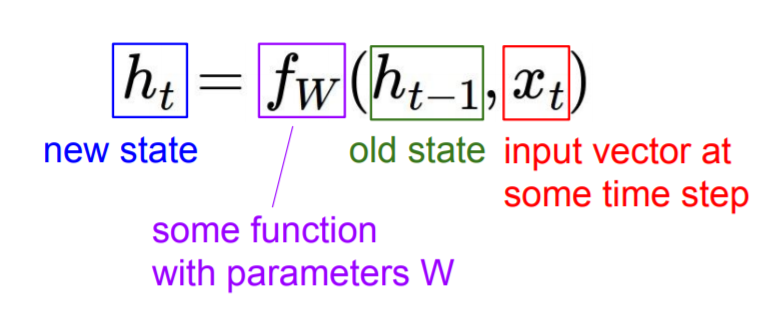

In [4]:
Image("./scr/07-01 RNN compute.png")

- 출력층  
$y_{t} = f(W_{y}h_{t} + b)$ 

RNN의 은닉층 연산을 벡터와 행렬 연산으로 이해할 수 있다.  
자연어 처리에서 RNN의 입력 $x_{t}$는 대부분의 경우에서 단어 벡터로 간주할 수 있는데,  
단어 벡터의 차원을 d,  
은닉 상태의 크기를 $D_h$라고 하였을 때,  
각 벡터와 행렬의 크기는 다음과 같다.

$x_t : d \times 1$  
$W_r : D_h \times d$  
$W_h : D_h \times D_h$  
$h_{t-1} : D_h \times 1$  
$b : D_h \times 1$

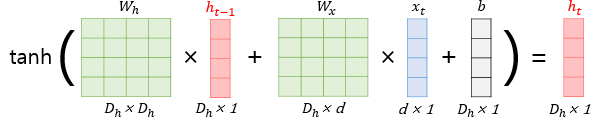

In [5]:
Image("./scr/07-01 rnn_images4-5.png")

위의 식에서 각각의 가중치 $W_x$, $W_h$, $W_y$의 값은 모든 시점에서 값을 동일하게 공유한다.  
만약 은닉층이 2개 이상일 경우에는 은닉층 2개의 가중치는 서로 다르다.  

출력층은 결과값인 $y_{t}$를 계산하기 위한 활성화 함수로는 상황에 따라 다른데,  
예컨대 이진 분류의 경우에는 시그모이드 함수를,  
다양한 카테고리에서 선택해야하는 경우에는 소프트맥스 함수를 사용하게 될 것이다.

### 2. 파이썬으로 RNN 구현하기

이제 직접 Numpy로 RNN 층을 구현해보자.
의사코드를 작성해보면 아래와 같겠다.

In [ ]:
hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화  
for input_t in input_length: # 각 시점마다 입력을 받는다.
    
    #각 시점에 대해서 입력과 은닉 상태를 가지고 연산    
    output_t = tanh(input_t, hidden_state_t) 

    #계산 결과는 현재 시점의 은닉 상태가 된다. 
    hidden_state_t = output_t  

t 시점의 은닉 상태 : hidden_state_t
입력 데이터의 길이를 : input_length

입력 데이터의 길이 == 총 시점의 수(timesteps)

t 시점의 입력값 : input_t

이제 코드로 구현해보자.  
단, 실제 파이토치에서는 (batch_size, timesteps, input_size)의 크기인 3D 텐서를 입력받는다는 것을 기억하자.

In [7]:
import numpy as np

timesteps = 10     # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_size = 4     # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8    # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0으로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

In [8]:
print(hidden_state_t) # 8의 크기를 가지는 은닉 상태. 현재는 초기 은닉 상태로 모든 차원이 0을 가짐.

[0. 0. 0. 0. 0. 0. 0. 0.]


가중치와 편향을 정의한다.  
Wx는 (은닉 상태의 크기 * 입력의 차원)  
Wh는 (은닉 상태의 크기 * 은닉 상태의 크기)  
bsms (은닉 상태의 크기)  
의 크기를 갖는다.

In [9]:
Wx = np.random.random((hidden_size,input_size)) # (8,4) 크기의 2D 텐서 생성. 입력에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size)) # (8,8) 크기의 2D 텐서 생성. 은닉 상태의 가중치.

b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 편향

In [10]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


이제 모든 시점의 은닉 상태를 출력한다고 가정하고, RNN 층을 동작시켜보자.

In [11]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
    # Wx * Xt + Wh * Ht-1 + b(bias)
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh,hidden_state_t) + b)

    # 각 시점의 은닉 상태의 값을 계속해서 축적
    total_hidden_states.append(list(output_t))

    # 각 시점별 메모리 셀의 출력 크기는 (timestep, output_dim)
    print(np.shape(total_hidden_states))

    hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0)

# (timesteps, output_dim)의 크기. 
# 이 경우 (10, 8)의 크기를 갖는 메모리 셀의 2D 텐서를 출력.
print(total_hidden_states) 

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.95533571 0.9028678  0.94619621 0.89469183 0.95444608 0.85628519
  0.93721369 0.82788046]
 [0.99999736 0.99998992 0.99986949 0.99930864 0.9999634  0.99989462
  0.99993559 0.99942886]
 [0.99999894 0.99999657 0.99995394 0.9995823  0.99997479 0.99994073
  0.99997152 0.99950597]
 [0.99999901 0.99999743 0.99998559 0.99986419 0.99998807 0.99995786
  0.99998772 0.99973726]
 [0.99999875 0.99999623 0.99998272 0.99952899 0.99998224 0.99993416
  0.99998212 0.99915323]
 [0.99999913 0.9999968  0.99995351 0.99954394 0.99997405 0.99994352
  0.99997232 0.99948831]
 [0.99999935 0.99999797 0.9999786  0.99960766 0.99997075 0.99994864
  0.9999823  0.99936763]
 [0.99999959 0.99999807 0.99998654 0.99955894 0.99997937 0.99995593
  0.99998782 0.99927381]
 [0.9999996  0.99999659 0.9999692  0.99967628 0.99999084 0.99996482
  0.99998483 0.99970425]
 [0.99999954 0.99999817 0.99999195 0.99988528 0.99999152 0.99996992
  0.9999929  0.99976865]

### 3. 파이토치의 nn.RNN()

파이토치에서는 nn.RNN()을 통해서 RNN 셀을 구현한다.

In [12]:
import torch
import torch.nn as nn

여기서 입력의 크기는 매 시점마다 들어가는 입력의 크기를 말한다.

In [ ]:
input_size = 5   # 입력의 크기
hidden_size = 8  # 은닉 상태의 크기

입력 텐서를 정의한다.  
(배치 크기 * 시점의 수 * 매 시점마다 들어가는 입력)의 크기를 갖는다.

In [15]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

이제 nn.RNN()을 사용하여 RNN의 셀을 만든다.  
인자로 입력의 크기, 은닉 상태의 크기를 정의해주고,    
batch_first = True를 통해 입력 텐서의 첫번째 차원이 배치 크기임을 알려준다.

In [16]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

입력 텐서를 RNN 셀에 입력하여 출력을 확인해보자.  

In [17]:
outputs, _status = cell(inputs)

RNN 셀은 두 개의 입력을 리턴하는데,   
첫 번째 리턴값(outputs)은 모든 시점의 은닉 상태들이며,  
두 번째 리턴값(_status)은 마지막 시점의 은닉 상태이다.  

우선 첫 번째 리턴값에 대해서 크기를 확인해보자.

In [18]:
print(outputs.shape)     # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


첫번째 리턴값의 은닉 상태가 (1,10,8)의 크기를 갖고 있다.  
이는 10번의 시점 동안 8차원의 은닉상태가 출력되었다는 뜻이다.  

두 번째 리턴값, 즉 마지막 시점의 은닉상태의 크기를 확인해보자.

In [20]:
print(_status.shape)

torch.Size([1, 1, 8])


### 4. 깊은 순환 신경망(Deep Recurrent Neural Network)

은닉층이 1개 더 추가되어 총 2개인 깊은(deep) 순환 신경망의 모습을 보여준다.  
파이토치로 구현할 때는 nn.RNN()의 인자인 num_layers에 값을 전달하여 층을 쌓는다.  
층이 2개인 깊은 순환 신경망의 경우, 앞서 실습했던 임의의 입력에 대해서 출력이 어떻게 달라지는지 확인해보자.

입력 텐서를 정의한다.  
(배치 크기 * 시점의 수 * 매 시점마다 들어가는 입력)의 크기를 갖는다.

In [25]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [26]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers=2, batch_first=True)

In [27]:
outputs, _status = cell(inputs)

첫 번째 리턴값의 크기는 층이 1개였던 RNN 셀 때와 달라지지 않았다.  

In [28]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


마지막 층의 모든 시점의 은닉 상태는 아래와 같다.

In [29]:
print(_status.shape)

torch.Size([2, 1, 8])


### 5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

이전 시점의 데이터뿐만 아니라, 이후 시점의 데이터로 힌트로 활용하기 위해 고안된 것이 양방향 RNN이다.  
양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용한다.    

첫 번째 메모리 셀은 **앞 시점의 은닉상태**(Forward States)를 전달받아 현재의 은닉상태를 계산한다.  
두 번째 메모리 셀은 앞에서 배운 것과는 다르게, **뒷 시점의 은닉상태**(Backward States)를 전달받아 현재의 은닉 상태를 계산한다.

그리고 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용된다.  

물론 양방향 RNN도 다수의 은닉층을 가질 수 있다.  
그러나 늘 그렇듯이 은닉층을 무조건 추가한다고 해서 모델의 성능이 좋아지는 것은 아니다.  
은닉층을 추가하면, 학습할 수 있는 양이 많아지지만 반대로 훈련 데이터 또한 그만큼 많이 필요하다.

양방향 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 bidirectional=True로 설정하면 된다.

입력 텐서를 정의한다.  
(배치 크기 * 시점의 수 * 매 시점마다 들어가는 입력)의 크기를 갖는다.

In [31]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

batch_first = True를 통해 입력 텐서의 첫번째 차원이 배치 크기임을 알려준다.

In [33]:
cell = nn.RNN(input_size = 5, hidden_size= 8 , num_layers= 2, batch_first=True, bidirectional=True)

In [34]:
outputs, _status = cell(inputs)

첫 번째 리턴값의 크기는 단방향 RNN의 셀 때보다 은닉 상태의 크기의 값이 두 배가 되었다.  
즉, (배치 크기, 시퀀스 길이, 은닉 상태의 크기 * 2)인데,  
이는 양방향의 은닉 상태 값들이 연결(concatenate)되었기 때문이다.  

In [35]:
print(outputs.shape) # (배치 크기, 시퀀스 길이, 은닉 상태의 크기 * 2)

torch.Size([1, 10, 16])


두 번째 리턴값의 크기는 (층의 개수 * 2, 배치 크기, 은닉 상태의 크기)를 가진다.  
이는 정방향 기준으로는 마지막 시점에 해당되면서, 역방향 기준에서는 첫 번째 시점에 해당되는 시점의 출력값을 층의 개수만큼 쌓아 올린 결과값이다.

In [36]:
print(_status.shape) # (층의 개수 * 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])
